In [1]:
!pip install spectral
import spectral.io.envi as envi
from spectral import *

     |████████████████████████████████| 194kB 3.3MB/s 


In [0]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import os
base_path = os.path.abspath('')

In [3]:
img2 = envi.open(base_path + '/Data/F15_20160101_20161231.v4.stable_lights.avg_vis.hdr', base_path + '/Data/F15_20160101_20161231.v4.stable_lights.avg_vis')
img_old = img2.load()
img_old = img_old.reshape(16801, 43201)
np.around(img_old, 0, out=img_old)
np.max(img_old)

63.0

In [4]:
import pandas as pd

# ['model_05','model_06','model_07','model_08', 'model_09', 'model_10', 'model_11', 'model_12', 'model_13', 'model_14', 'model_15', 'model_16', 
#                                                             'model_17','model_18', 'model_19', 'model_20', 'model_21', 'model_22', 'model_23']
# these are all possible models (in my case) 

models_to_estimate = ['model_18', 'model_19', 'model_20', 'model_21', 'model_22', 'model_23']

df_coords =  pd.read_pickle(base_path + '/Data/spots_of_interest.pkl')
indexies = ['MAE_all map', 'MSE_all map','L_infinity_norm_all map']
for i in df_coords.columns:
  indexies.append('MAE_{}'.format(i))
  indexies.append('MSE_{}'.format(i))
  indexies.append('R2_{}'.format(i))
  indexies.append('L_infinity_norm_{}'.format(i))
df_accuracy = pd.DataFrame(np.nan, index=indexies, columns=models_to_estimate)
df_accuracy

,model_18,model_19,model_20,model_21,model_22,model_23
MAE_all map,NaN,NaN,NaN,NaN,NaN,NaN
MSE_all map,NaN,NaN,NaN,NaN,NaN,NaN
L_infinity_norm_all map,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Las Vegas,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Las Vegas,NaN,NaN,NaN,NaN,NaN,NaN
R2_Las Vegas,NaN,NaN,NaN,NaN,NaN,NaN
L_infinity_norm_Las Vegas,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN
R2_Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_coords

,Las Vegas,Los Angeles,Guangzhou + Hong Kong,Moscow,Brightest spot
Y,4800,4983,6380,2410,7942
X,8000,7621,35402,26256,14065


In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error


for model in models_to_estimate:
  model_number = int(model[-2:])
  prediction = np.load(base_path + '/Predictions/pred{}.npz'.format(model_number))['arr_0']
  df_accuracy.iloc[0].loc[model], df_accuracy.iloc[1].loc[model] = mean_absolute_error(img_old, prediction), mean_squared_error(img_old, prediction)
  df_accuracy.iloc[2].loc[model] = max_error(img_old.reshape(-1), prediction.reshape(-1))
  print(model_number - int(models_to_estimate[0][-2:]) + 1, '/', len(models_to_estimate), 'started')
  for j in range(1,6):
    y = df_coords.iloc[0,j-1]
    x = df_coords.iloc[1,j-1]
    df_accuracy.iloc[j*4-1].loc[model], df_accuracy.iloc[j*4].loc[model], df_accuracy.iloc[j*4+1].loc[model] = mean_absolute_error(img_old[y-210:y, x-300:x], prediction[y-210:y, x-300:x]), mean_squared_error(img_old[y-210:y, x-300:x], prediction[y-210:y, x-300:x]), r2_score(img_old[y-210:y, x-300:x], prediction[y-210:y, x-300:x])
    df_accuracy.iloc[j*4+2].loc[model] = max_error(img_old[y-210:y, x-300:x].reshape(-1), prediction[y-210:y, x-300:x].reshape(-1))

df_accuracy

1 / 6 bitch
2 / 6 bitch
3 / 6 bitch
4 / 6 bitch
5 / 6 bitch
6 / 6 bitch


,model_18,model_19,model_20,model_21,model_22,model_23
MAE_all map,0.090728,0.086223,0.088220,0.085016,0.080875,0.150667
MSE_all map,0.367262,0.394548,0.415201,0.387345,0.376565,1.000575
L_infinity_norm_all map,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
MAE_Las Vegas,0.484095,0.479889,0.470032,0.397619,0.379889,0.722365
MSE_Las Vegas,1.717587,1.708270,1.983365,1.611651,1.398143,3.875159
R2_Las Vegas,0.796192,0.802794,0.786005,0.844138,0.838117,0.642084
L_infinity_norm_Las Vegas,17.000000,16.000000,25.000000,21.000000,16.000000,27.000000
MAE_Los Angeles,1.368746,1.386302,1.302794,1.221460,1.098730,2.646762
MSE_Los Angeles,4.063317,4.299127,4.025365,3.706127,3.228889,16.387905
R2_Los Angeles,0.956728,0.956813,0.954516,0.964628,0.969509,0.882573


In [0]:
prediction = np.load(base_path + '/Predictions/pred{}.npz'.format(22))['arr_0']

In [0]:
from skimage.io import imsave
from skimage.io import call_plugin, use_plugin, find_available_plugins
use_plugin('imageio')

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 63.0]
    G: [0.0, 63.0]
    B: [0.0, 63.0]

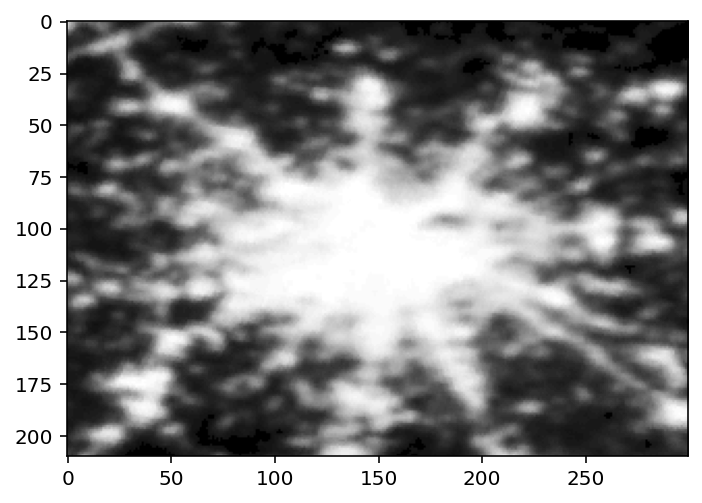

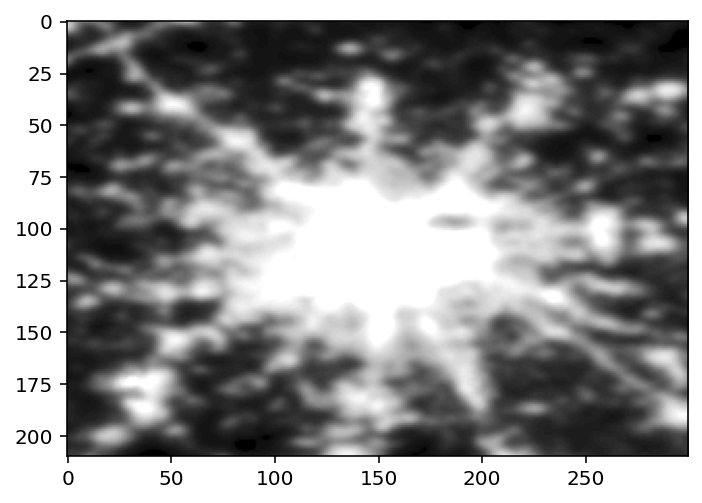

In [9]:
y = df_coords.iloc[0,3]
x = df_coords.iloc[1,3]
imshow(img_old[y-210:y, x-300:x])
imshow(prediction[y-210:y, x-300:x])

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
sns.set_style("whitegrid")
for model in models_to_estimate:
  model_number = int(model[-2:])
  prediction = np.load(base_path + '/Predictions/pred{}.npz'.format(model_number))['arr_0']
  for j in range(1, 6):
    y = df_coords.iloc[0,j-1]
    x = df_coords.iloc[1,j-1]
    spot_name = df_coords.columns[j-1]
    imsave(base_path + '/Predictions/preds_for_spots/{}_{}.jpg'.format(spot_name, model_number), prediction[y-210:y, x-300:x], quality=75)

    orig = img_old[y-210:y, x-300:x].reshape(-1, 1)
    pred = prediction[y-210:y, x-300:x].reshape(-1, 1)
    data = pd.DataFrame(data=np.concatenate((orig, pred), axis=1), columns=['Original', 'Predicted'])
    data = data.groupby(by=['Original', 'Predicted'])['Predicted'].count().reset_index(name='Count')
    data['Sum'] = data.groupby('Original')['Count'].transform('sum')
    data['Fraction'] = data.Count / data.Sum

    x_bins = np.linspace(0,63,64)
    y_bins = np.linspace(0,63,64)
    f, ax = plt.subplots(figsize=(8, 8))
    sns.despine(f)
    cmp = sns.cubehelix_palette(rot=0.8, start=0, as_cmap=True)
    sns_plot = sns.scatterplot(x='Original', y='Predicted', data=data, hue='Fraction',hue_norm=(0,1), size='Count', x_bins=x_bins, y_bins=y_bins, ax=ax, palette=cmp)
    figure = sns_plot.get_figure()
    figure.savefig(base_path + '/Predictions/preds_for_spots/{}_{}_plot.jpg'.format(spot_name, model_number))

Output hidden; open in https://colab.research.google.com to view.

In [13]:
np.max(prediction[y-110:y-60, x-175:x-125])

46.0

In [0]:
# for j in range(1, 6):
#     y = df_coords.iloc[0,j-1]
#     x = df_coords.iloc[1,j-1]
#     spot_name = df_coords.columns[j-1]
#     #imshow(img_old[y-210:y, x-300:x])
#     #imshow(prediction[y-210:y, x-300:x])
#     imsave('/content/drive/My Drive/Diploma/Predictions/preds_for_spots/{}_{}.jpg'.format(spot_name, 'ground_truth'), img_old[y-210:y, x-300:x], quality=75)

In [16]:
y = df_coords.iloc[0,2]
x = df_coords.iloc[1,2]
from sys import getsizeof
orig = img_old[y-210:y, x-300:x].reshape(-1, 1)
pred = prediction[y-210:y, x-300:x].reshape(-1, 1)
print(getsizeof(orig) / (1024 * 1024))
# orig = orig[orig != 0]
# pred = pred[pred != 0]
# print(getsizeof(orig) / (1024 * 1024))

# img_old = None
# prediction = None
data = pd.DataFrame(data=np.concatenate((orig, pred), axis=1), columns=['Original', 'Predicted'])
#data = data.loc[(data.Original != 0) & (data.Predicted != 0)]
data = data.groupby(by=['Original', 'Predicted'])['Predicted'].count().reset_index(name='Count')
data['Sum'] = data.groupby('Original')['Count'].transform('sum')
data['Fraction'] = data.Count / data.Sum
data.head()

0.0001068115234375


,Original,Predicted,Count,Sum,Fraction
0,0.0,0.0,15418,15457,0.997477
1,0.0,1.0,3,15457,0.000194
2,0.0,2.0,3,15457,0.000194
3,0.0,3.0,7,15457,0.000453
4,0.0,4.0,3,15457,0.000194


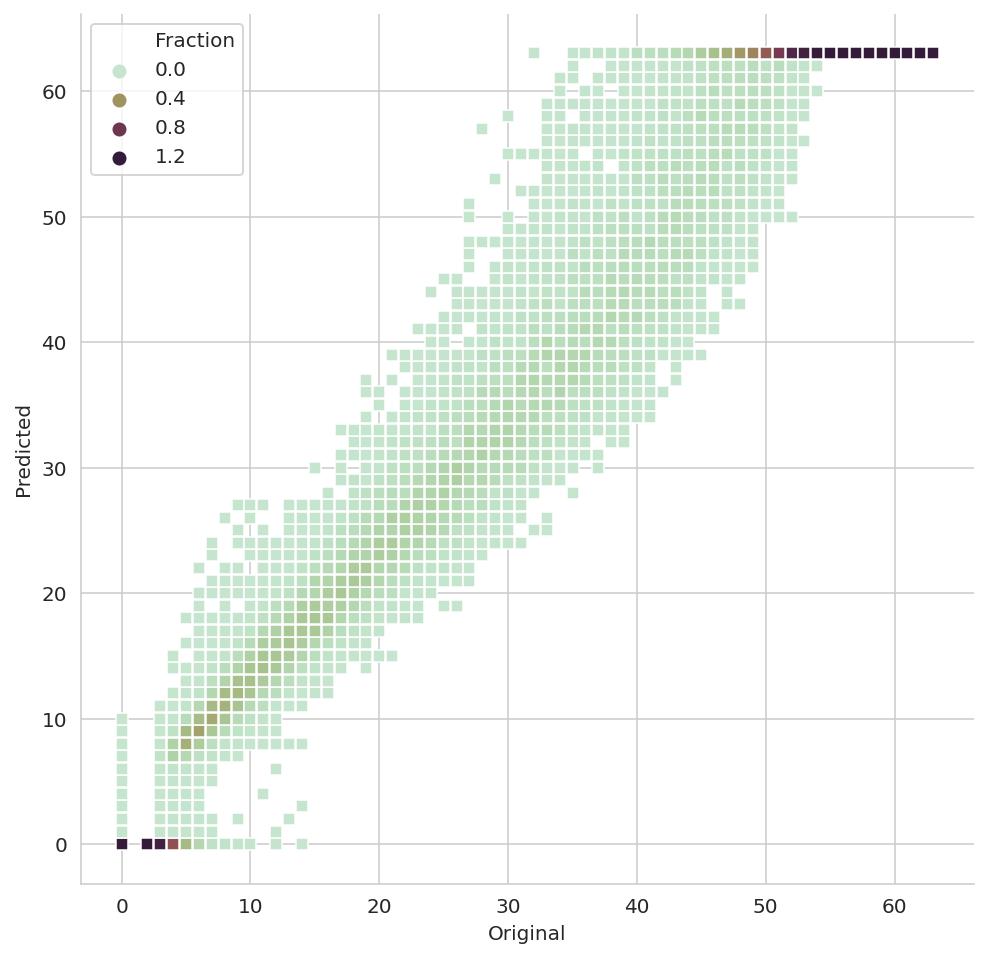

In [17]:
x_bins = np.linspace(0,63,64)
y_bins = np.linspace(0,63,64)
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f)
cmp = sns.cubehelix_palette(rot=0.8, start=0, as_cmap=True)
sns_plot = sns.scatterplot(x='Original', y='Predicted', data=data, hue='Fraction',hue_norm=(0,1), x_bins=x_bins, y_bins=y_bins, ax=ax, palette=cmp, marker='s')
# figure = sns_plot.get_figure()
# figure.savefig('output.png')
# sns.regplot(x='Original', y='Predicted', data=data, ax=ax, marker='s')

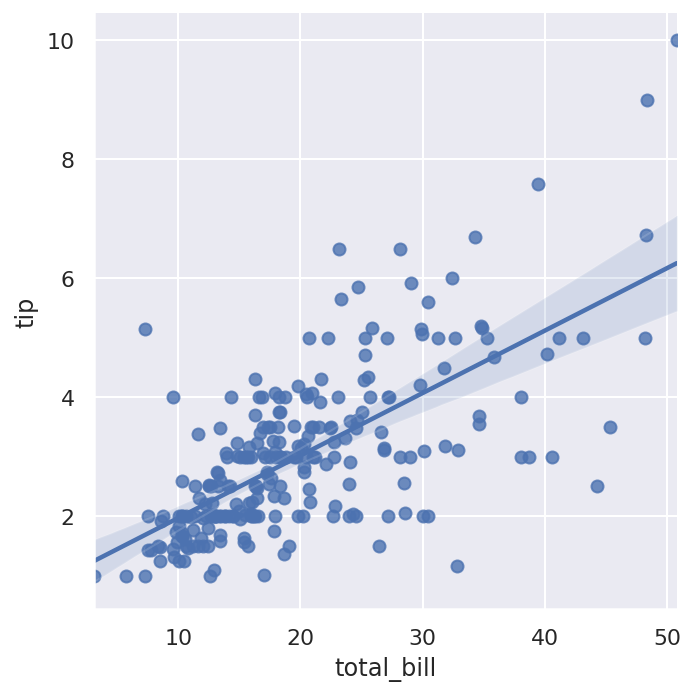

In [18]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips") sns.lmplot(x="total_bill", y="tip", data=tips)